# Business Case:
No-Churn Telecom is an established Telecom operator in Europe
with more than a decade in Business. Due to new players in the
market, telecom industry has become very competitive and
retaining customers becoming a challenge.
In spite of No-Churn initiatives of reducing tariffs and promoting
more offers, the churn rate ( percentage of customers migrating to
competitors) is well above 10%.
No-Churn wants to explore possibility of Machine Learning to help
with following use cases to retain competitive edge in the industry.
#PROJECT GOAL
Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers
to migrate.
2. Creating Churn risk scores that can be indicative to drive
retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values
YES(1) or NO(0) so that email campaigns with lucrative offers
can be targeted to Churn YES customers.

In [1]:
!pip install mysql-connector-python

import mysql.connector

In [2]:
conn = mysql.connector.connect(host='18.136.157.135',user='dm_team3',password='DM!$!Team!27@9!20&',database='project_telecom')

In [3]:
conn.is_connected()

True

In [4]:
cursor = conn.cursor()
cursor.execute("SHOW TABLES")
tables = cursor.fetchall()

In [5]:
for table in tables:
    print(table[0])

telecom_churn_data


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_sql_query('Select * from telecom_churn_data',conn)
df = pd.DataFrame(df)
df.head()

C:\Users\shaik\AppData\Local\Temp\ipykernel_47548\1008678846.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('Select * from telecom_churn_data',conn)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
df.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

In [9]:
df.rename(columns={'columns1':'State',
                                     'columns2':'Account Length',
                                     'columns3':'Area Code',
                                     'columns4':'Phone',
                                     'columns5':'International Plan',
                                     'columns6':'VMail Plan',
                                     'columns7':'VMail Message',
                                     'columns8':'Day Mins',
                                     'columns9':'Day Calls',
                                     'columns10':'Day Charge',
                                     'columns11':'Eve Mins',
                                     'columns12':'Eve Calls',
                                     'columns13':'Eve Charge',
                                     'columns14':'Night Mins',
                                     'columns15':'Night Calls',
                                     'columns16':'Night Charge',
                                     'columns17':'International Mins',
                                     'columns18':'International calls',
                                     'columns19':'International Charge',
                                     'columns20':'CustServ Calls',
                                     'columns21':'Churn'},inplace=True)

In [10]:
df_copy = df.copy()

In [11]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
df.shape

(4617, 21)

In [14]:
uniquee = df.nunique()
uniquee

State                     51
Account Length           218
Area Code                  3
Phone                   4617
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64

In [15]:
# checkin isnull
df.isnull().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [16]:
# cheking duplicate values
df.duplicated().sum()

np.int64(0)

In [17]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [18]:
# Removing '.' from columns
df['Churn'] = df['Churn'].str.replace('.','')

In [19]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# EDA

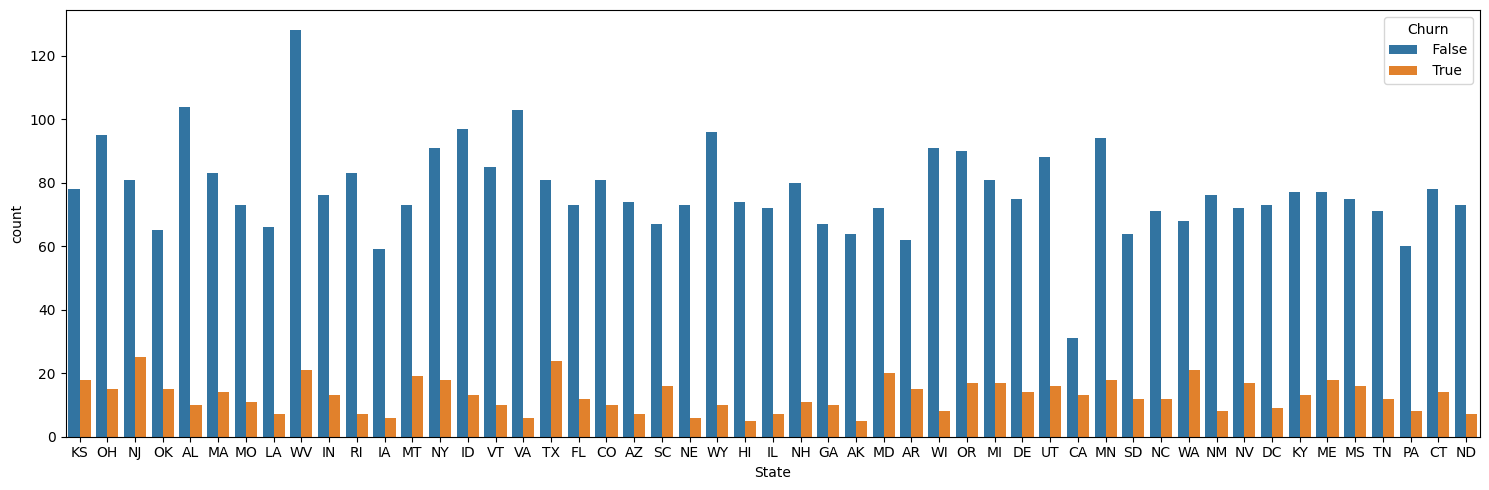

In [20]:
# State with Churn
plt.figure(figsize=(15,5))
sns.countplot(x='State',hue='Churn',data=df)
plt.tight_layout()
plt.show()

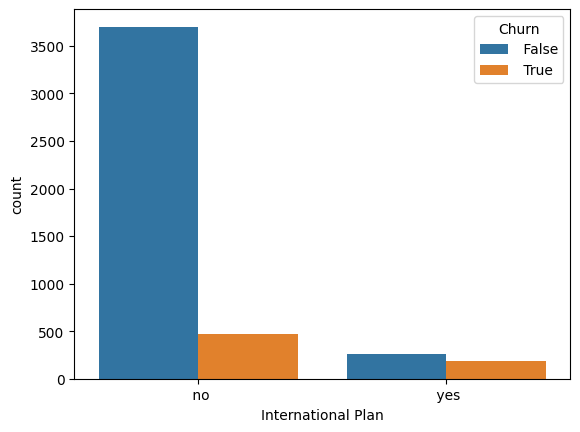

In [21]:
# International Plan with Churn
sns.countplot(x='International Plan',hue='Churn',data=df)
plt.show()

In [22]:
# if International Plan then chanses of churn is very high

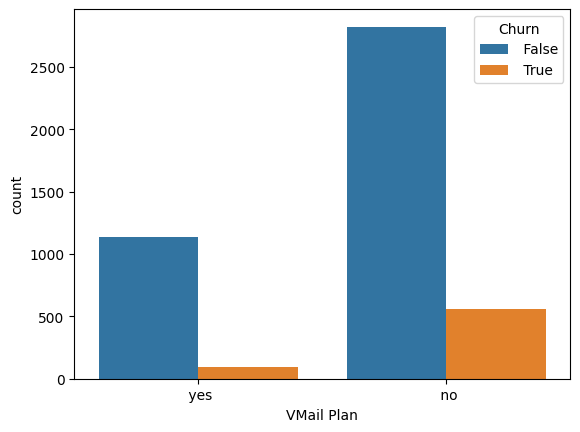

In [23]:
# VMail Plan with churn
sns.countplot(x='VMail Plan',hue='Churn',data=df)
plt.show()

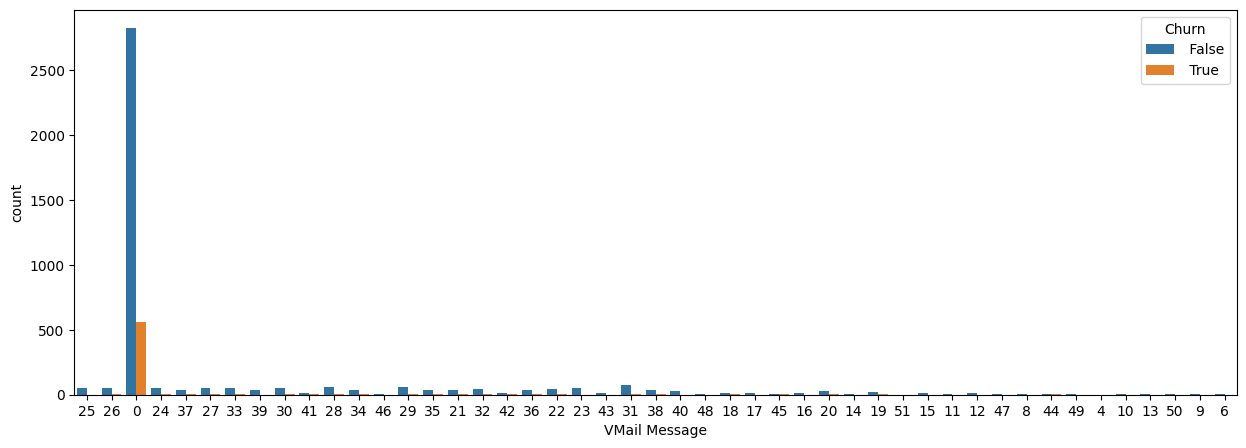

In [24]:
# VMail Message with churn
plt.figure(figsize=(15,5))
sns.countplot(x='VMail Message',hue='Churn',data=df)
plt.show()

In [25]:
# more number of VMail Message more number of churn

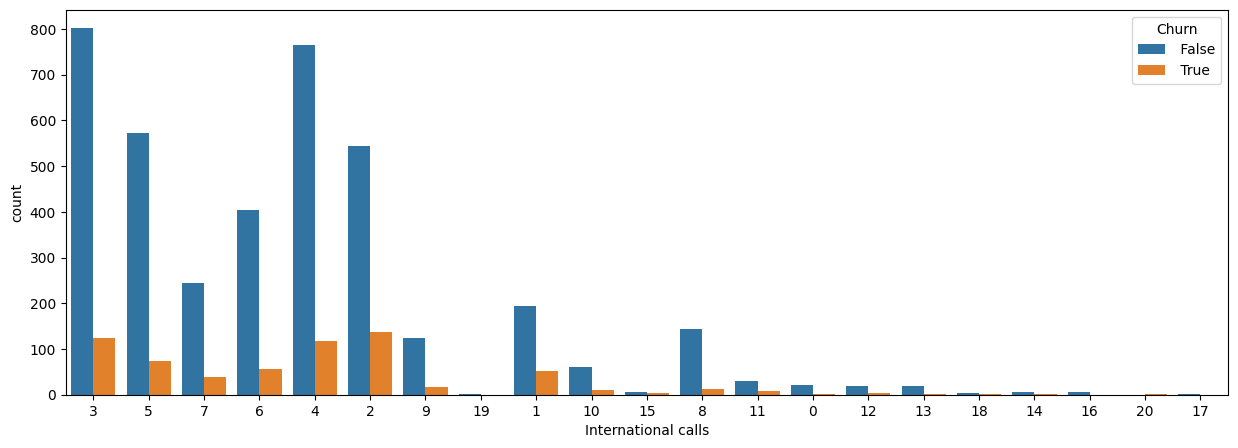

In [26]:
# International calls with churn
plt.figure(figsize=(15,5))
sns.countplot(x='International calls',hue='Churn',data=df)
plt.show()

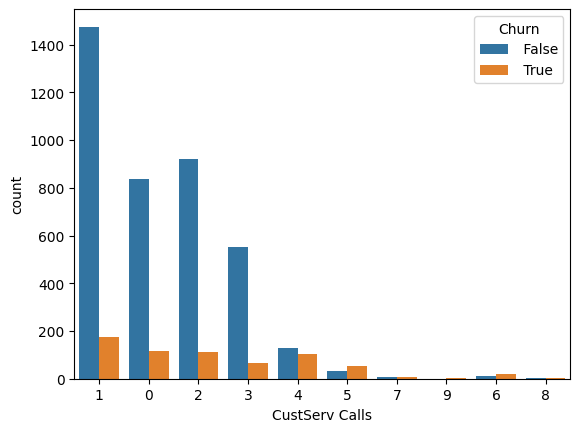

In [27]:
# CustServ Calls with churn
sns.countplot(x='CustServ Calls',hue='Churn',data=df)
plt.show()

In [28]:
# high number customer calls high chances of churn

In [29]:
# Churn rate distribution
df['Churn'].value_counts(normalize=True) * 100


Churn
False    85.79164
True     14.20836
Name: proportion, dtype: float64

In [30]:
df.sample(5)

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
3647,WY,88,408,411-9815,no,no,0,166.4,97,28.29,186.7,118,15.87,251.6,89,11.32,14.5,4,3.92,0,False
2247,CO,80,415,406-5710,no,no,0,194.8,116,33.12,209.9,93,17.84,194.1,100,8.73,12.8,3,3.46,0,False
213,AZ,86,408,405-1842,no,yes,31,167.6,139,28.49,113,118,9.61,246.9,121,11.11,12.2,6,3.29,1,False
1870,AZ,43,415,362-3660,no,no,0,179.3,97,30.48,252.7,126,21.48,227.5,114,10.24,8,5,2.16,0,False
2745,PA,61,408,343-1347,no,yes,40,105,78,17.85,180.6,100,15.35,174.1,115,7.83,10.2,2,2.75,2,True


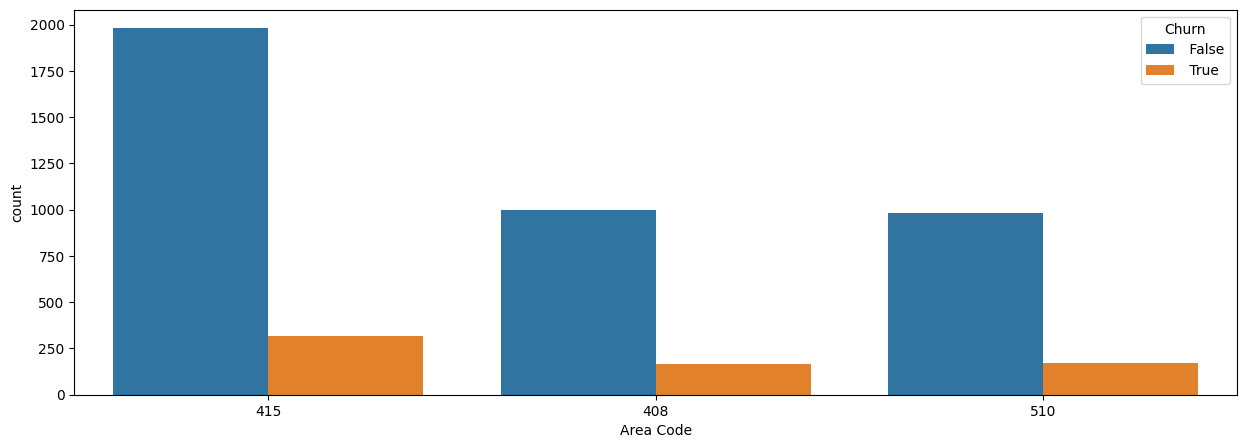

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x='Area Code',hue='Churn',data=df)
plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_47548\2924121363.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Day Mins'])


<Axes: xlabel='Day Mins', ylabel='Density'>

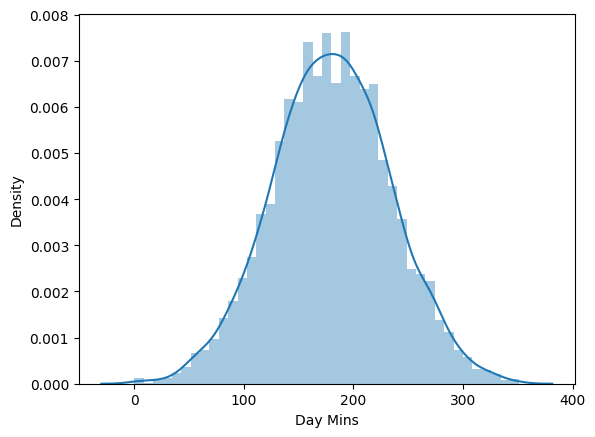

In [32]:
# Day min cheking
sns.distplot(df['Day Mins'])

C:\Users\shaik\AppData\Local\Temp\ipykernel_47548\3051337502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Day Calls'])


<Axes: xlabel='Day Calls', ylabel='Density'>

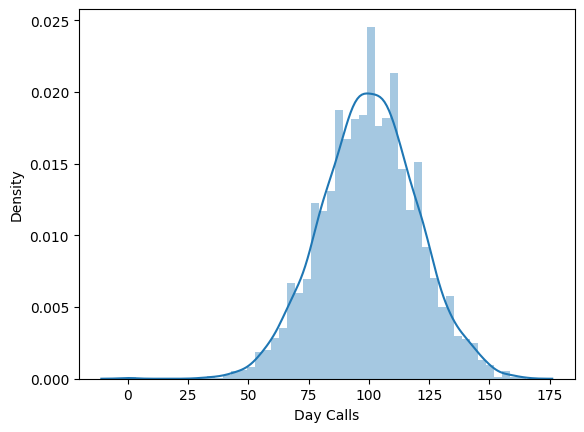

In [33]:
sns.distplot(df['Day Calls'])

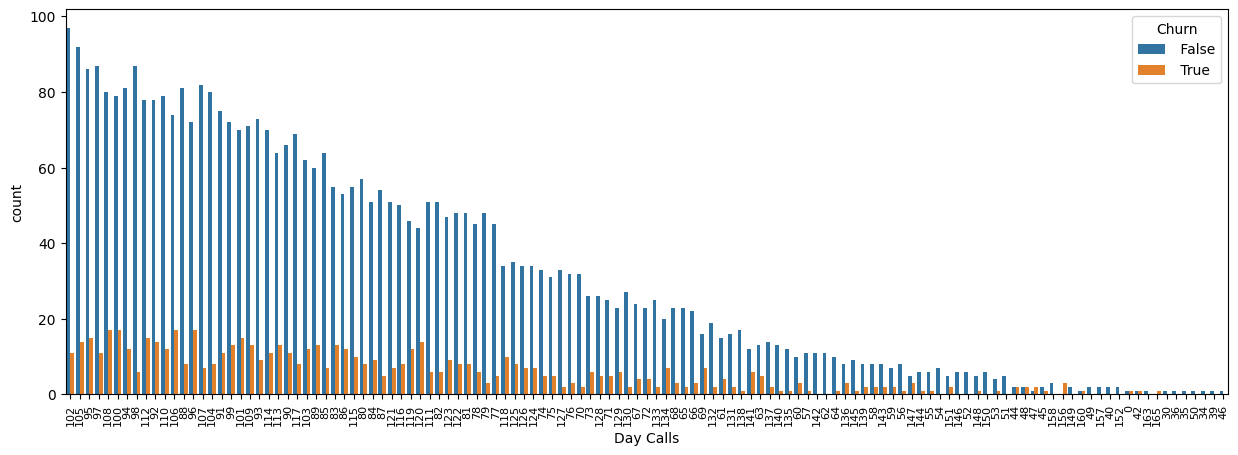

<Figure size 640x480 with 0 Axes>

In [34]:
# Day Calls
plt.figure(figsize=(15,5))
sns.countplot(x=df['Day Calls'],hue=df['Churn'],data=df, order=df['Day Calls'].value_counts(ascending=False).index)
plt.xticks(rotation=90,size=8)
plt.show()
plt.tight_layout()

C:\Users\shaik\AppData\Local\Temp\ipykernel_47548\1500543350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Day Charge'])


<Axes: xlabel='Day Charge', ylabel='Density'>

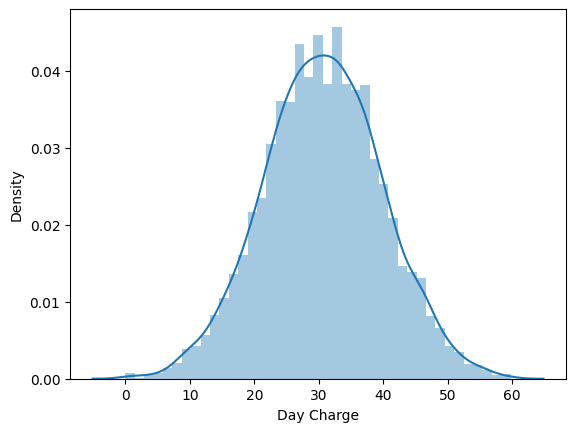

In [35]:
# day charges
sns.distplot(df['Day Charge'])

C:\Users\shaik\AppData\Local\Temp\ipykernel_47548\2183048220.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Eve Mins'],kde=True)


<Axes: xlabel='Eve Mins', ylabel='Density'>

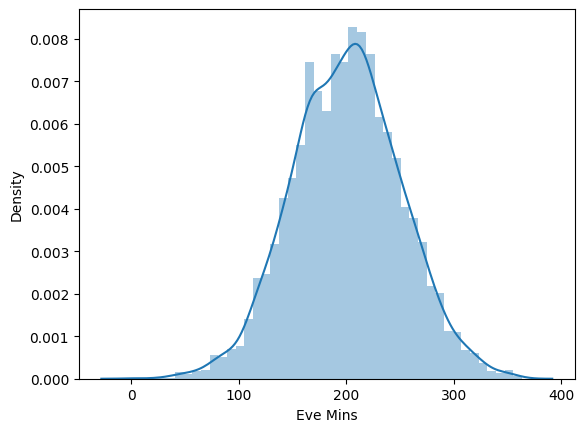

In [36]:
# Eve Mins
sns.distplot(df['Eve Mins'],kde=True)

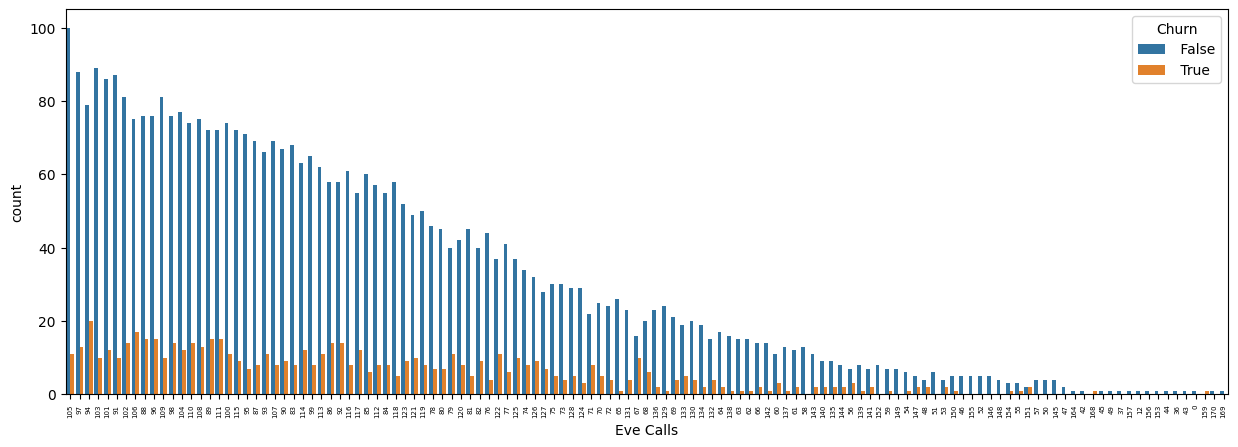

<Figure size 640x480 with 0 Axes>

In [37]:
# Eve Calls
plt.figure(figsize=(15,5))
sns.countplot(x=df['Eve Calls'],hue=df['Churn'],data=df, order=df['Eve Calls'].value_counts(ascending=False).index)
plt.xticks(rotation=90,size=5)
plt.show()
plt.tight_layout()

C:\Users\shaik\AppData\Local\Temp\ipykernel_47548\1561644751.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Night Mins'])


<Axes: xlabel='Night Mins', ylabel='Density'>

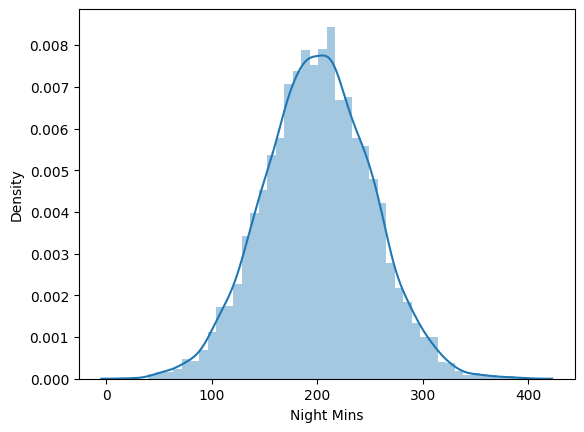

In [38]:
# Night Mins
sns.distplot(df['Night Mins'])

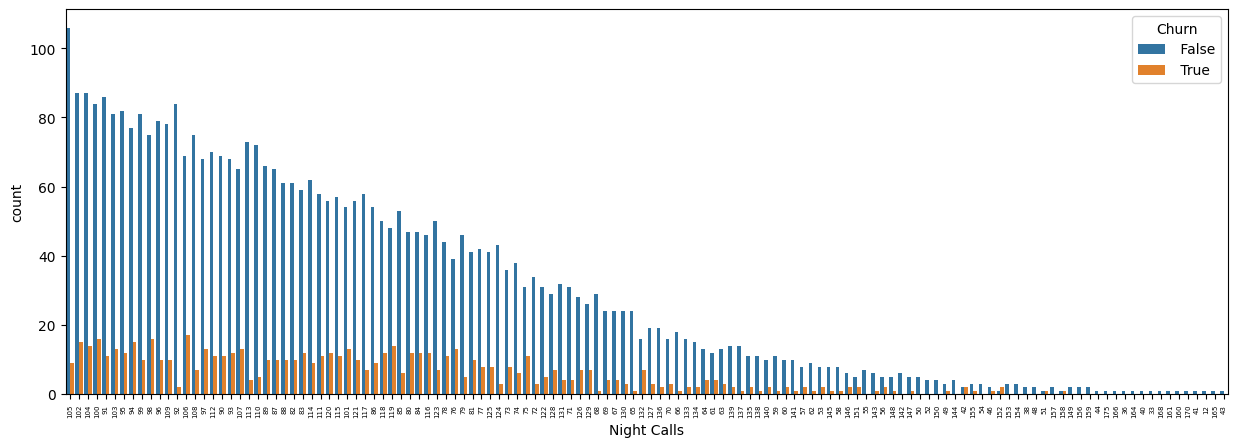

<Figure size 640x480 with 0 Axes>

In [39]:
# Night CalleNight Calls
plt.figure(figsize=(15,5))
sns.countplot(x=df['Night Calls'],hue=df['Churn'],data=df, order=df['Night Calls'].value_counts(ascending=False).index)
plt.xticks(rotation=90,size=5)
plt.show()
plt.tight_layout()

<Axes: xlabel='International calls', ylabel='count'>

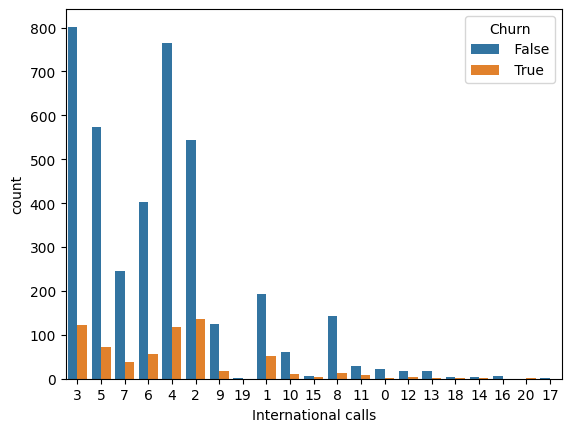

In [40]:
# International calls
sns.countplot(data=df,x='International calls',hue='Churn')


C:\Users\shaik\AppData\Local\Temp\ipykernel_47548\1294275217.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['International Mins'])


<Axes: xlabel='International Mins', ylabel='Density'>

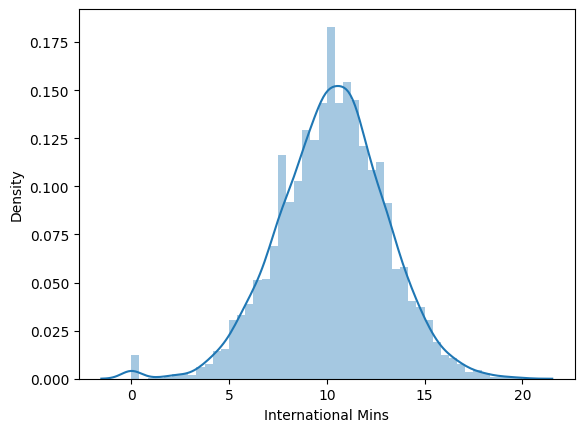

In [41]:
# International Mins
sns.distplot(df['International Mins'])

In [42]:
# # charges of calles
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Night Charge'], label='Night Charge', kde=True)
# sns.histplot(df['Day Charge'], label='Day Charge', kde=True)
# sns.histplot(df['Eve Charge'], label='Eve Charge', kde=True)
# sns.histplot(df['International Charge'], label='International Charge', kde=True)

# plt.xlabel('Charges')
# plt.ylabel('Frequency')
# plt.title('Distribution of Night, Day,International Charge, and Eve Charges')
# plt.legend()
# plt.show()

In [43]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [44]:
# # min counts
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Night Mins'], label='Night Mins', kde=True)
# sns.histplot(df['Day Mins'], label='Day Mins', kde=True)
# sns.histplot(df['Eve Mins'], label='Eve Mins', kde=True)

# plt.xlabel('Mins')
# plt.ylabel('Frequency')
# plt.title('Distribution of Night Mins, Day Mins,International Mins, and Eve Mins')
# plt.legend()
# plt.show()

In [45]:
df['CustServ Calls'].value_counts()

CustServ Calls
1    1651
2    1031
0     951
3     616
4     234
5      89
6      28
7      13
9       2
8       2
Name: count, dtype: int64

<Axes: xlabel='CustServ Calls', ylabel='count'>

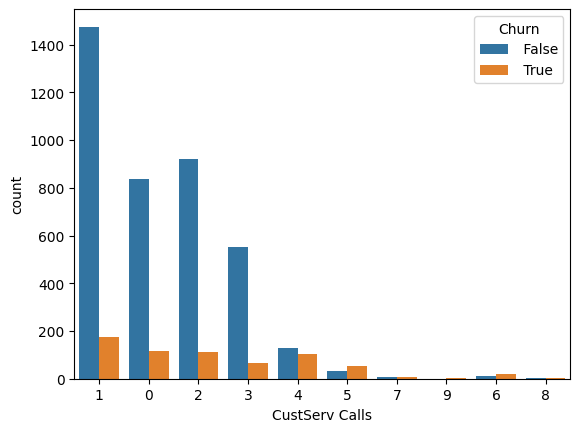

In [46]:
sns.countplot(data=df,x='CustServ Calls',hue='Churn')

In [47]:
# if the high number of calls coming from customer to customer service more chances of churn

In [48]:
# removing un used columns
df.drop(columns=['Phone'],inplace=True)

# Encoding

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   International Plan    4617 non-null   object
 4   VMail Plan            4617 non-null   object
 5   VMail Message         4617 non-null   object
 6   Day Mins              4617 non-null   object
 7   Day Calls             4617 non-null   object
 8   Day Charge            4617 non-null   object
 9   Eve Mins              4617 non-null   object
 10  Eve Calls             4617 non-null   object
 11  Eve Charge            4617 non-null   object
 12  Night Mins            4617 non-null   object
 13  Night Calls           4617 non-null   object
 14  Night Charge          4617 non-null   object
 15  International Mins    4617 non-null   

In [50]:
df.describe()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,2,2,47,1901,123,1901,1833,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,no,no,0,189.3,102,32.18,169.9,105,14.25,186.2,105,9.66,11.1,3,3,1,False
freq,149,63,2299,4171,3381,3381,10,108,10,10,111,15,10,115,19,81,925,81,1651,3961


In [51]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [52]:
# importing label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['State'] = label.fit_transform(df['State'])

In [53]:
df['Churn'] = df['Churn'].str.strip().str.lower()
df['Churn'] = df['Churn'].map({'true': 1, 'false': 0})

df['International Plan'] = df['International Plan'].str.strip().str.lower()
df['International Plan'] = df['International Plan'].map({'yes': 1, 'no': 0})

# Remove leading/trailing whitespace
df['VMail Plan'] = df['VMail Plan'].str.strip().str.lower()
df['VMail Plan'] = df['VMail Plan'].map({'yes': 1, 'no': 0})


In [54]:
df.sample(5)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
1927,36,110,510,0,0,0,188,127,31.96,90.5,118,7.69,150.3,64,6.76,15.3,3,4.13,3,0
1688,23,98,415,0,0,0,72.8,107,12.38,186.4,103,15.84,175.3,110,7.89,10.5,4,2.84,3,0
1133,33,64,408,0,0,0,148.1,73,25.18,164.9,101,14.02,216,125,9.72,12.3,2,3.32,5,1
641,45,74,408,0,0,0,165.3,120,28.1,198.5,106,16.87,208.5,102,9.38,9.8,3,2.65,1,0
1748,26,71,510,0,1,23,175.7,82,29.87,258.9,136,22.01,268.4,154,12.08,14.1,7,3.81,1,0


In [55]:
scl = df[['Day Mins','Day Charge','Eve Mins','Eve Charge','Night Mins','Night Charge','International Mins','International Charge']]

In [56]:
scl.head()

,Day Mins,Day Charge,Eve Mins,Eve Charge,Night Mins,Night Charge,International Mins,International Charge
0,265.1,45.07,197.4,16.78,244.7,11.01,10,2.7
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.7
2,243.4,41.38,121.2,10.3,162.6,7.32,12.2,3.29
3,299.4,50.9,61.9,5.26,196.9,8.86,6.6,1.78
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73


In [57]:
# Scaaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Day Mins','Day Charge','Eve Mins','Eve Charge','Night Mins','Night Charge','International Mins','International Charge']] = scaler.fit_transform(scl)


In [58]:
df.sample(5)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
3115,49,102,408,0,0,0,0.667994,125,0.668005,0.547704,99,0.547719,0.376547,88,0.376569,0.500,1,0.500000,4,0
1006,37,48,415,0,0,0,0.541679,92,0.541667,0.872972,85,0.873180,0.296396,113,0.296473,0.415,4,0.414815,2,0
4184,20,131,415,0,0,0,0.605405,108,0.605422,0.582898,115,0.582983,0.572082,96,0.572624,0.490,11,0.490741,0,0
2263,44,32,510,0,1,26,0.692745,137,0.692771,0.651086,108,0.651246,0.403712,149,0.404065,0.450,9,0.450000,1,0
1927,36,110,510,0,0,0,0.534851,127,0.534806,0.248831,118,0.248787,0.341850,64,0.341901,0.765,3,0.764815,3,0


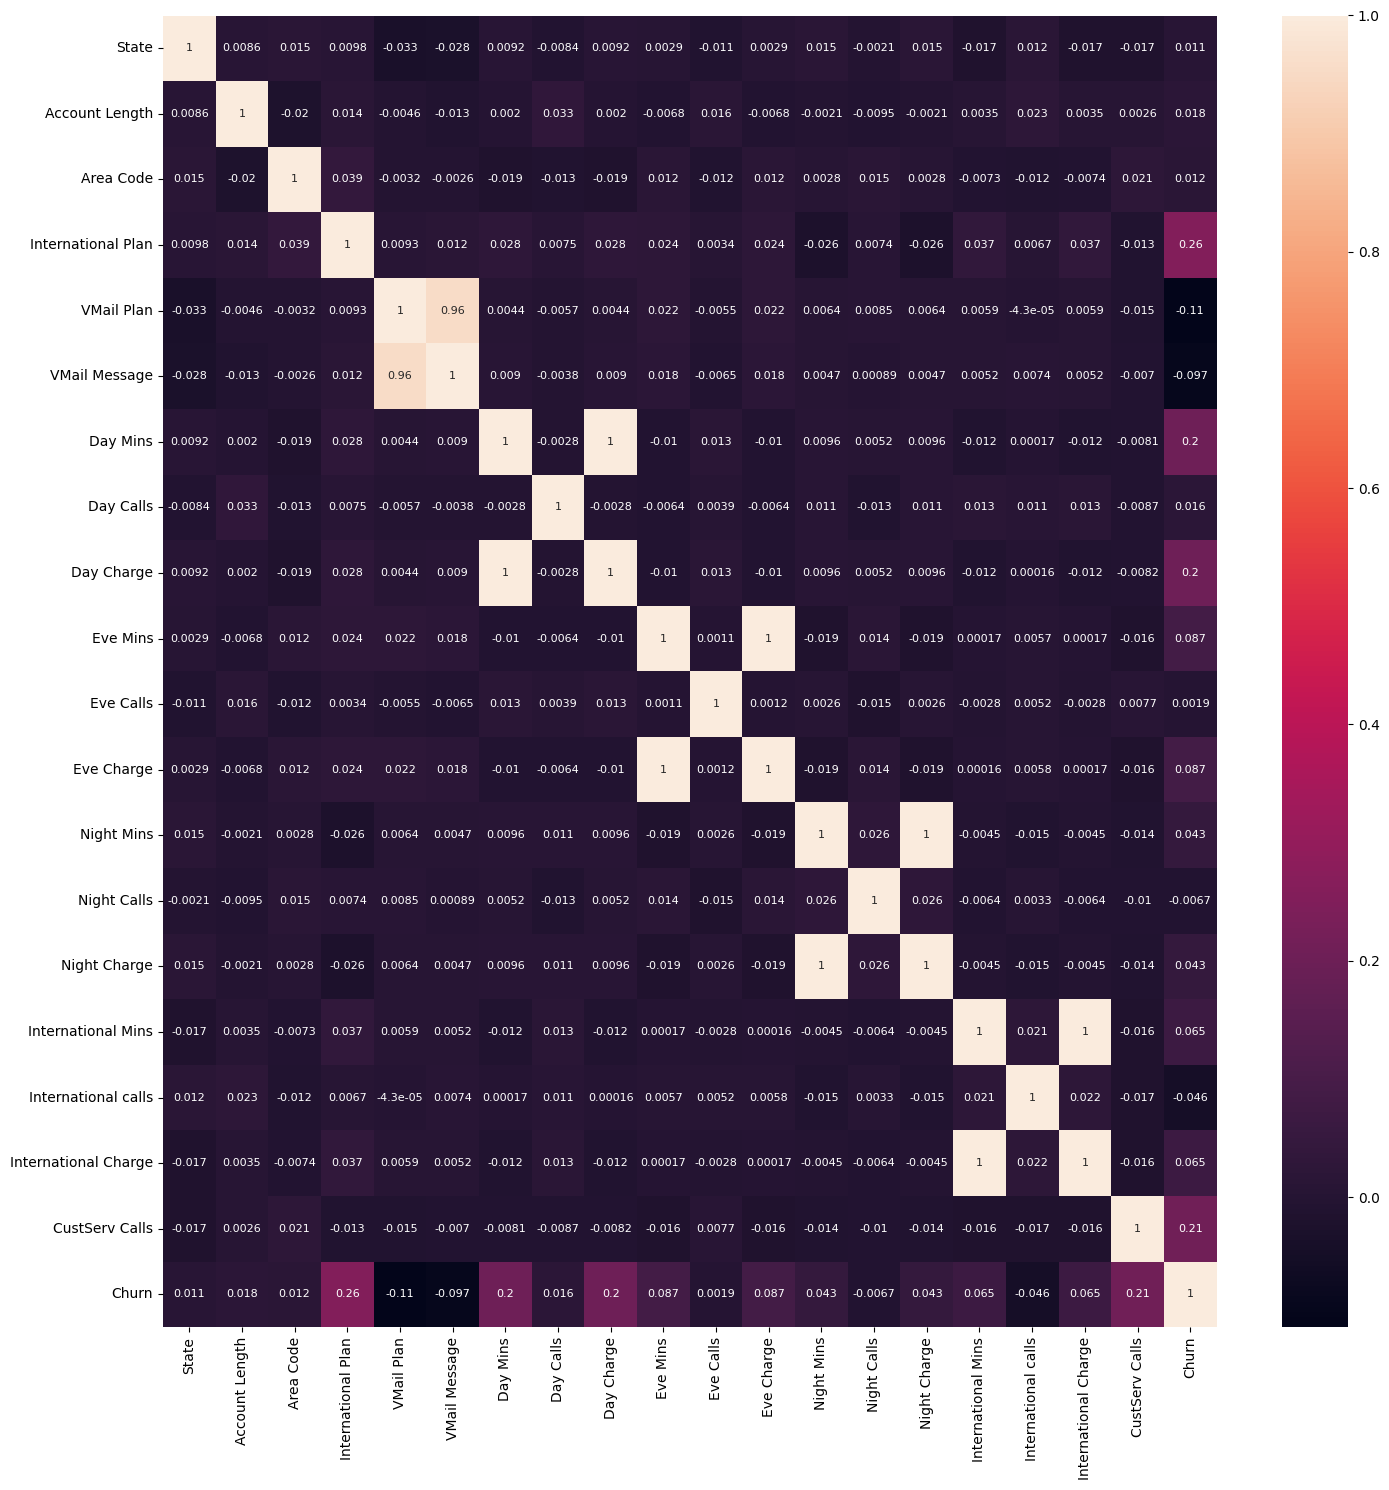

In [59]:
# feature selection
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,annot_kws={"size": 8})
plt.tight_layout()
plt.show()

In [60]:
# many columns has high correlation then we drop the columns
# name VMail Message


In [61]:
# drop
df.drop(columns=['VMail Message'],inplace=True)
df.drop(columns=['Eve Charge'],inplace=True)
df.drop(columns=['International Charge'],inplace=True)
df.drop(columns=['Night Charge'],inplace=True)
df.drop(columns=['Day Charge'],inplace=True)

In [62]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,International Mins,International calls,CustServ Calls,Churn
0,16,128,415,0,1,0.754196,110,0.542755,99,0.595750,91,0.500,3,1,0
1,35,107,415,0,1,0.459744,123,0.537531,103,0.621840,103,0.685,3,1,0
2,31,137,415,0,0,0.692461,114,0.333242,110,0.374933,104,0.610,5,0,0
3,35,84,408,1,0,0.851778,71,0.170195,88,0.467187,89,0.330,7,2,0
4,36,75,415,1,0,0.474253,113,0.407754,122,0.440290,121,0.505,3,3,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                4617 non-null   int64  
 1   Account Length       4617 non-null   object 
 2   Area Code            4617 non-null   object 
 3   International Plan   4617 non-null   int64  
 4   VMail Plan           4617 non-null   int64  
 5   Day Mins             4617 non-null   float64
 6   Day Calls            4617 non-null   object 
 7   Eve Mins             4617 non-null   float64
 8   Eve Calls            4617 non-null   object 
 9   Night Mins           4617 non-null   float64
 10  Night Calls          4617 non-null   object 
 11  International Mins   4617 non-null   float64
 12  International calls  4617 non-null   object 
 13  CustServ Calls       4617 non-null   object 
 14  Churn                4617 non-null   int64  
dtypes: float64(4), int64(4), object(7)
mem

In [64]:
# data type change
df['Account Length'] = df['Account Length'].astype(int)
df['Area Code'] = df['Area Code'].astype(int)
df['Day Calls'] = df['Day Calls'].astype(int)
df['Eve Calls'] = df['Eve Calls'].astype(int)
df['Night Calls'] = df['Night Calls'].astype(int)
df['International calls'] = df['International calls'].astype(int)
df['CustServ Calls'] = df['CustServ Calls'].astype(int)

In [65]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls',
       'Night Mins', 'Night Calls', 'International Mins',
       'International calls', 'CustServ Calls', 'Churn'],
      dtype='object')

In [66]:
# name change
df = df.rename(columns={'Account Length':'Account_Length','Area Code':'Area_Code','International Plan':'International_Plan',
                         'VMail Plan':'VMail_Plan','Day Mins':'Day_Mins','Day Calls':'Day_Calls',
                         'Eve Mins':'Eve_Mins','Eve Calls':'Eve_Calls','Night Mins':'Night_Mins',
                        'Night Calls':'Night_Calls','International Mins':'International_Mins',
                       'International calls':'International_calls', 'CustServ Calls':'CustServ_Calls' })

In [67]:
# model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [68]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [69]:
# creating csv
df.to_csv('clean_data.csv',index=False)


In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [71]:
LR = LogisticRegression()
LR.fit(X_train,y_train)


C:\Users\shaik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
pred = LR.predict(X_test)

In [73]:
accuracy_score(y_test,pred)

0.8636363636363636

In [74]:
confusion_matrix(y_test,pred)

array([[776,  23],
       [103,  22]])

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       799
           1       0.49      0.18      0.26       125

    accuracy                           0.86       924
   macro avg       0.69      0.57      0.59       924
weighted avg       0.83      0.86      0.83       924



In [76]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
pred = model.predict(X_test)

In [78]:
predict_proba = model.predict_proba(X_test)

In [79]:
accuracy_score(y_test,pred)

0.9632034632034632

In [80]:
confusion_matrix(y_test,pred)

array([[794,   5],
       [ 29,  96]])

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       799
           1       0.95      0.77      0.85       125

    accuracy                           0.96       924
   macro avg       0.96      0.88      0.91       924
weighted avg       0.96      0.96      0.96       924



In [82]:
# pickel file
import pickle
with open('XGmodel.pkl','wb') as file:
    pickle.dump(model,file)

# churn flag

In [83]:
# giving input data for prediction
input_data = [[28,	124,	415,	0,	0	,0.427596,	101,	0.703602,	112,	0.305272,	62	,0.625,	4,	2	]]
# Converting into dataframe
input_df = pd.DataFrame(input_data,columns=X.columns)
# prediction
prediction =model.predict(input_df)[0]
prediction

# churn flag
def churn_flag(prediction):
  if prediction==1:
    return 'Hight Risk'
  else:
    return 'Low Risk'

# function calling
churn_flag(prediction)


'Low Risk'

# Churn risk score

In [84]:
probabilities = model.predict_proba(X)  # Use your entire dataset (X)

In [85]:
churn_risk_scores = probabilities[:, 1] * 100
# Multiply by 100 to get percentage scores

In [86]:
df['Churn_Risk_Score'] = churn_risk_scores

In [87]:
# Example segmentation:
high_risk_customers = df[df['Churn_Risk_Score'] >= 80]
# Adjust threshold as needed
medium_risk_customers = df[(df['Churn_Risk_Score'] >= 60) & (df['Churn_Risk_Score'] < 80)]
low_risk_customers = df[df['Churn_Risk_Score'] < 60]

In [88]:
df.head()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_Mins,International_calls,CustServ_Calls,Churn,Churn_Risk_Score
0,16,128,415,0,1,0.754196,110,0.542755,99,0.595750,91,0.500,3,1,0,0.461754
1,35,107,415,0,1,0.459744,123,0.537531,103,0.621840,103,0.685,3,1,0,0.193860
2,31,137,415,0,0,0.692461,114,0.333242,110,0.374933,104,0.610,5,0,0,0.071243
3,35,84,408,1,0,0.851778,71,0.170195,88,0.467187,89,0.330,7,2,0,3.121405
4,36,75,415,1,0,0.474253,113,0.407754,122,0.440290,121,0.505,3,3,0,0.148736


In [89]:
df.shape

(4617, 16)

In [90]:
# pickel file
import pickle
with open('XGmodel.pkl','wb') as f:
  pickle.dump(model,f)

In [91]:
X_train.shape

(3693, 14)

In [92]:
X_train.describe()

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,International_Mins,International_calls,CustServ_Calls
count,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000,3693.000000
mean,26.220688,100.180883,436.556729,0.093420,0.276198,0.514203,100.083401,0.551211,99.935283,0.476232,99.640130,0.512314,4.430815,1.572976
std,14.699492,39.676499,41.977679,0.291059,0.447177,0.153722,19.900064,0.138619,19.772867,0.134639,20.028452,0.138357,2.457305,1.305209
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058634,12.000000,0.000000,0.000000,0.000000
25%,14.000000,73.000000,415.000000,0.000000,0.000000,0.409388,87.000000,0.455595,87.000000,0.386767,86.000000,0.425000,3.000000,1.000000
50%,26.000000,100.000000,415.000000,0.000000,0.000000,0.511238,100.000000,0.550729,100.000000,0.475524,100.000000,0.515000,4.000000,1.000000
75%,39.000000,127.000000,415.000000,0.000000,1.000000,0.617070,113.000000,0.643662,113.000000,0.567509,113.000000,0.600000,6.000000,2.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,1.000000,165.000000,1.000000,170.000000,0.964766,175.000000,1.000000,19.000000,9.000000


In [93]:
X_train.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'VMail_Plan', 'Day_Mins', 'Day_Calls', 'Eve_Mins', 'Eve_Calls',
       'Night_Mins', 'Night_Calls', 'International_Mins',
       'International_calls', 'CustServ_Calls'],
      dtype='object')

In [94]:
X_train['CustServ_Calls'].value_counts()

CustServ_Calls
1    1353
2     823
0     735
3     487
4     181
5      76
6      26
7       9
9       2
8       1
Name: count, dtype: int64

In [96]:
df.shape

(4617, 16)